In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./water_potability.csv")

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [5]:
df.shape

(3276, 10)

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
print("mean of pH:",df["ph"].mean())
print("mean of sulfate:",df["Sulfate"].mean())
print("mean of Trihalomethanes:",df["Trihalomethanes"].mean())

mean of pH: 7.080794504276835
mean of sulfate: 333.7757766108135
mean of Trihalomethanes: 66.39629294676803


In [8]:
df["ph"]=df["ph"].fillna(7.0)
df["Sulfate"]=df["Sulfate"].fillna(333)
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(66)

In [30]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

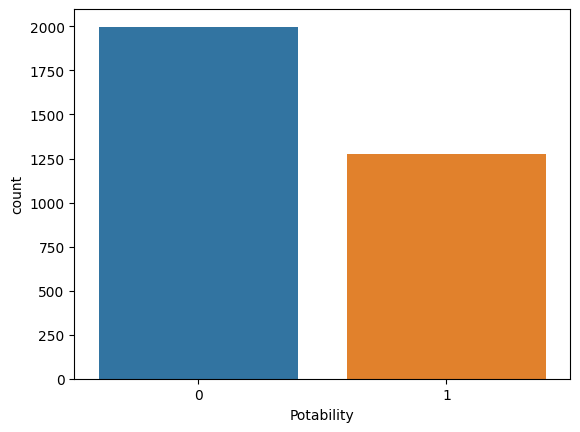

In [32]:
sns.countplot(x=df["Potability"],label="count")
plt.show()

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

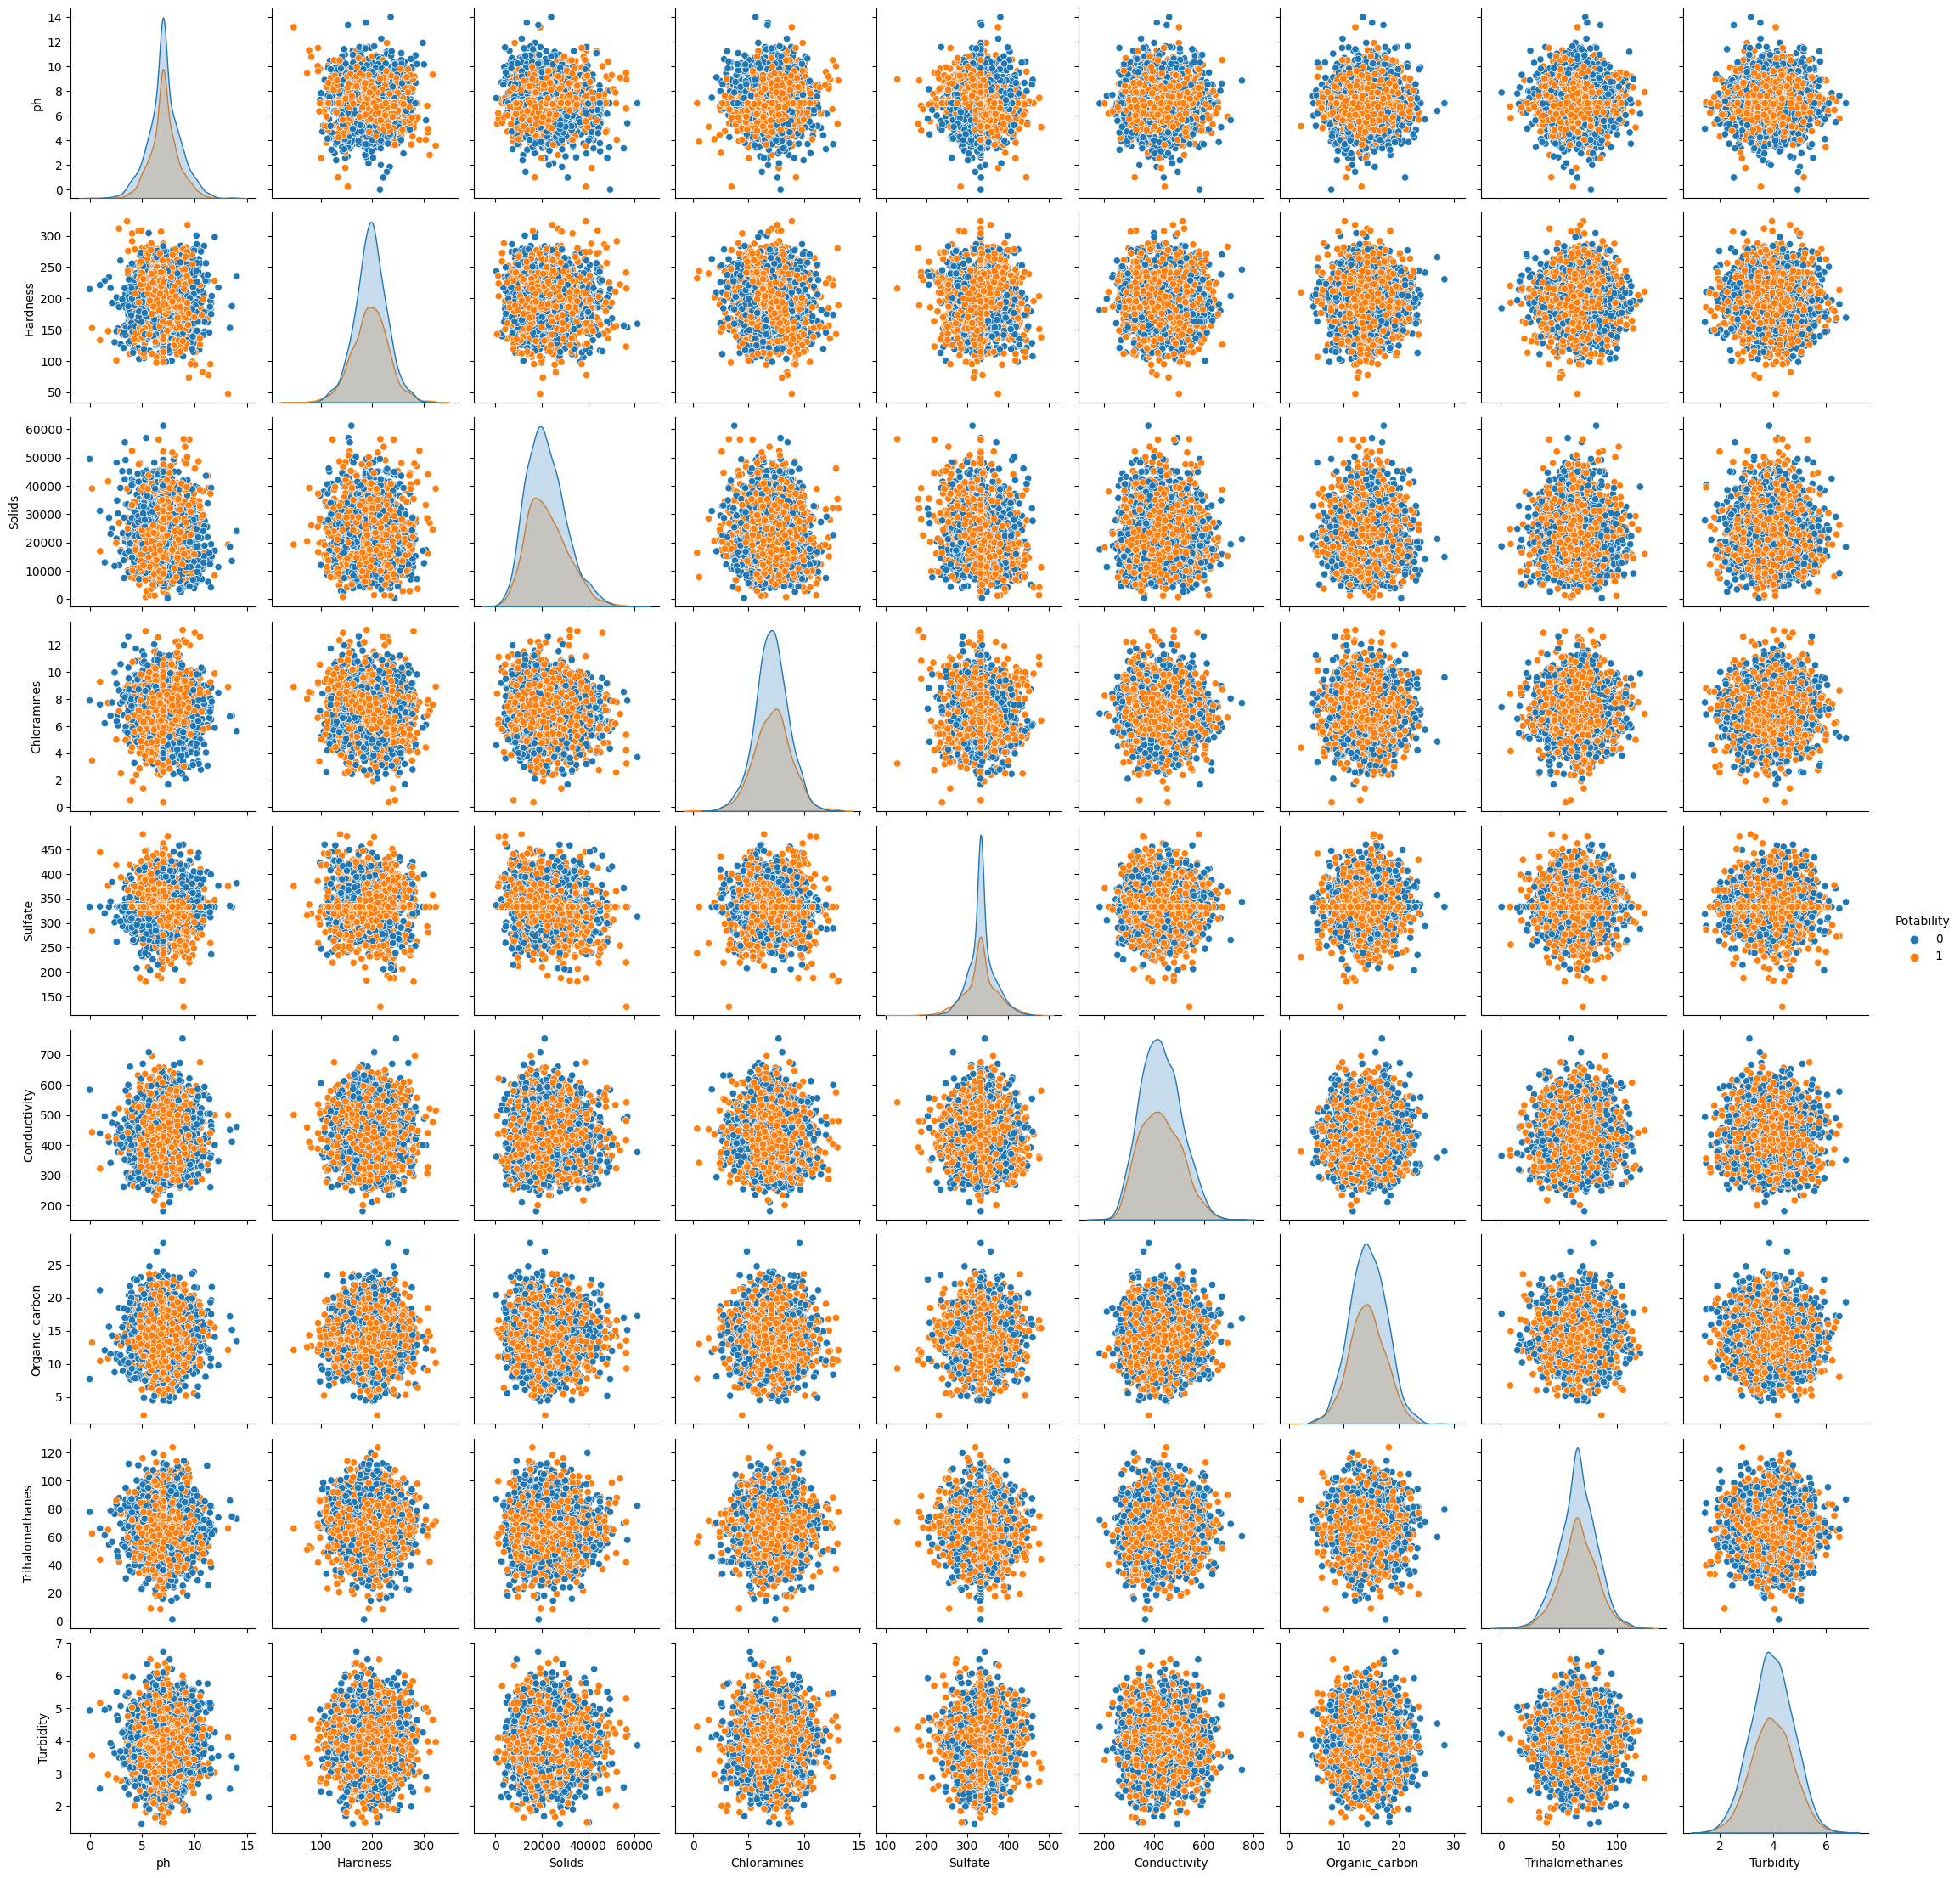

In [12]:
sns.pairplot(df.iloc[:,0:10],hue='Potability')

In [13]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075693 -0.082098    -0.031679  0.013971   
Hardness         0.075693  1.000000 -0.046899    -0.030054 -0.092840   
Solids          -0.082098 -0.046899  1.000000    -0.070148 -0.149737   
Chloramines     -0.031679 -0.030054 -0.070148     1.000000  0.023759   
Sulfate          0.013971 -0.092840 -0.149737     0.023759  1.000000   
Conductivity     0.017693 -0.023915  0.013831    -0.020486 -0.014195   
Organic_carbon   0.040386  0.003610  0.010242    -0.012653  0.027122   
Trihalomethanes  0.003254 -0.012660 -0.009008     0.016648 -0.025772   
Turbidity       -0.036008 -0.014449  0.019546     0.002363 -0.009765   
Potability      -0.002786 -0.013837  0.033743     0.023779 -0.020461   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017693        0.040386         0.003254  -0.036008   
Hardness            -0.023915        0.003610        -0.012660  -0.014449   
Solids               0.013831        0.010242        -0.009008   0.019546   
Chloramines         -0.020486       -0.012653         0.016648   0.002363   
Sulfate             -0.014195        0.027122        -0.025772  -0.009765   
Conductivity         1.000000        0.020966         0.001379   0.005798   
Organic_carbon       0.020966        1.000000        -0.013006  -0.027308   
Trihalomethanes      0.001379       -0.013006         1.000000  -0.021527   
Turbidity            0.005798       -0.027308        -0.021527   1.000000   
Potability          -0.008128       -0.030001         0.007089   0.001581   

                 Potability  
ph                -0.002786  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020461  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007089  
Turbidity          0.001581  
Potability         1.000000

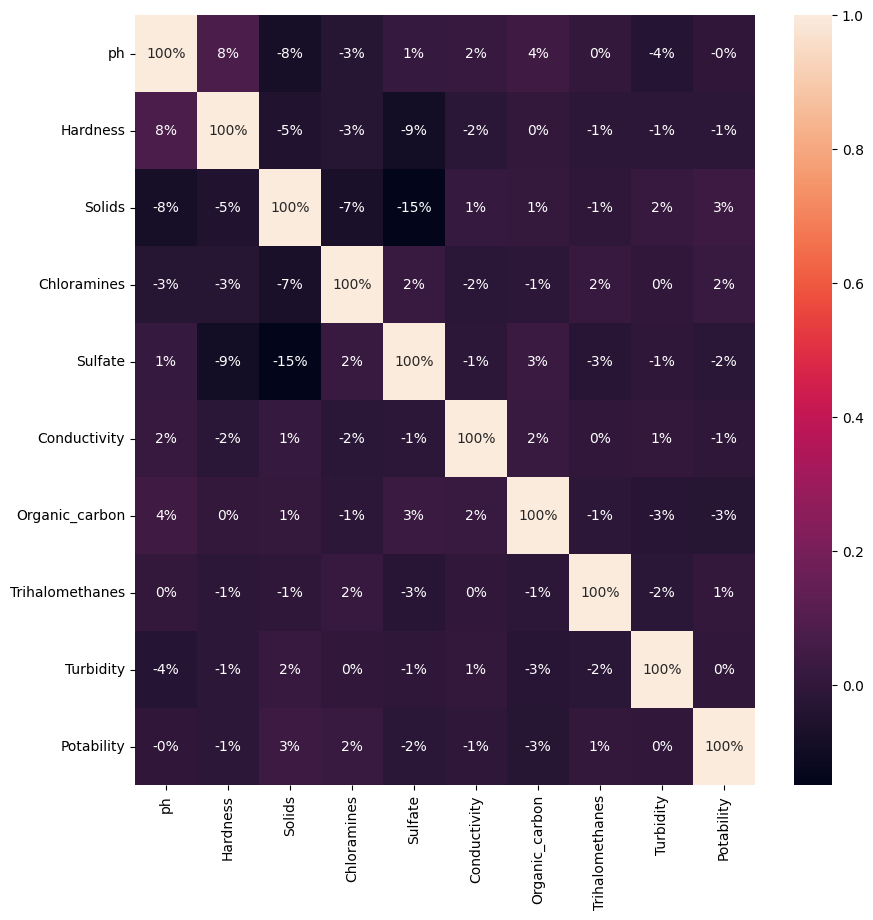

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:10].corr(),annot=True,fmt=".0%")
plt.show()

In [15]:
x=df.iloc[:,0:10].values
y=df.iloc[:,9:10].values

In [16]:
x.shape

(3276, 10)

In [17]:
y.shape

(3276, 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [53]:
def models(x_train,y_train):
  #Logistic Regression Model
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
  
    return log

In [54]:
model=models(x_train,y_train)

In [57]:
from sklearn.metrics import confusion_matrix

print("Logistic Regression Model Accuracy")
cm =confusion_matrix(y_test,model.predict(x_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print("Testing Accuracy = ", (TP+TN) / (TP+TN+FN+FP))
print()

Logistic Regression Model Accuracy
[[502   0]
 [  0 317]]
Testing Accuracy =  1.0



In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print( classification_report(y_test,model.predict(x_test)))
print( accuracy_score(y_test,model.predict(x_test)))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       1.00      1.00      1.00       317

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

1.0

